<span style="font-family:Georgia;">

# **Solución numérica de EDOs con métodos implícitos y Newton**  
## Aplicación a modelos de epidemiología: SI, SIR y SIRV


In [1]:
from src.epidemiologia import *

<span style="font-family:Georgia;">

## Método de Newton en **una dimensión**

Dado un problema no lineal $f(x)=0$, Newton construye iteraciones
$$
x_{k+1} \;=\; x_k \;-\; \frac{f(x_k)}{f'(x_k)},
$$
partiendo de un **punto inicial** $x_0$.

En el método de Newton 1D solemos detenernos cuando el **incremento** entre iteraciones es pequeño *en sentido relativo*:
$$
\frac{|x_{k+1}-x_k|}{\max\{1,\;|x_{k+1}|\}} \le \text{tol}.
$$
Esto equivale a comprobar
$$
|x_{k+1}-x_k| \le \text{tol}\cdot \max\{1,\;|x_{k+1}|\}.
$$

Un criterio típico de paro es
$|x_{k+1}-x_k|\le \text{tol}\cdot\max\{1,|x_{k+1}|\}$ o $|f(x_k)|$ pequeño.

**Ventajas:** convergencia cuadrática cerca de la raíz (si $f'$ no se anula).  
**Desventajas:** se requiere evaluar la derivada y una buena aproximación inicial.


In [2]:
# Ejemplo: f(x) = x^2 - 2  (raíz: sqrt(2))
f = lambda x: x**2 - 2.0
df = lambda x: 2.0*x

raiz, iters, hist = newton_1d(f, df, x0=1.0, tolerancia=1e-14)
print(f"Raíz aproximada: {raiz:.15f}  |  Iteraciones: {iters}")
print(f"Error absoluto aprox: {abs(raiz - np.sqrt(2.0)):.3e}")


Raíz aproximada: 1.414213562373095  |  Iteraciones: 6
Error absoluto aprox: 2.220e-16


<span style="font-family:Georgia;">

##  Recordatorio de un método implícito (RK2): **método del trapecio**

Sea el problema de valor inicial (PVI)
$$\
y'(t) = f(t,y(t)), \quad y(t_0)=y_0,
$$
con paso $h>0$ y nodos $t_{n+1}=t_n+h$. El **método del trapecio** (también
conocido como Crank–Nicolson) es
$$\
y_{n+1} \;=\; y_n\;+\;\frac{h}{2}\big[f(t_n,y_n)\;+\;f(t_{n+1},y_{n+1})\big].
$$

Como $y_{n+1}$ aparece **implícito**, debemos resolver, para cada paso, la ecuación no lineal
$$\
g(z)\;=\; z - y_n - \frac{h}{2}\Big( f(t_n,y_n) + f(t_{n+1},z) \Big)\;=\;0.
$$

La derivada (en 1D) es
$$\
g'(z) \;=\; 1 - \frac{h}{2}\,\partial_y f(t_{n+1},z).
$$

Usaremos **Newton** para resolver $g(z)=0$ en cada paso,
tomando como predicción inicial $z^{(0)}= y_n + h\,f(t_n,y_n)$ (Euler explícito).

<span style="font-family:Georgia;">

## Modelo de infecciones **SI** (reducción a 1D y solución explícita)

Enfermedades infecciosas como la gripe o el sarampión pueden modelarse, en primera aproximación, distinguiendo solo dos *poblaciones* en cada tiempo $t$: los **susceptibles** $S(t)$ (individuos sanos que pueden infectarse) y los **infectados** $I(t)$ (individuos que portan y transmiten la infección). La **población total** se denota por $N$ y, bajo los supuestos básicos del modelo SI, se mantiene **constante** en el horizonte de estudio: $S(t)+I(t)=N$ para todo tiempo $t$. 

Los supuestos clave son:  
1. **población cerrada** (sin nacimientos, muertes ni migración),  
2. **mezcla homogénea** (todos se mezclan por igual),  
3. **pasos de tiempo discretos** de duración fija (por ejemplo, días o semanas),  
4. **tasa de transmisión constante** por paso, representada por un parámetro $\beta>0$, y  
5. **sin recuperación**: una vez infectado, un individuo permanece en $I$ (no hay clase de recuperados).  

A menudo se **normaliza** por $N$ para trabajar con proporciones $S(t)/N$ e $I(t)/N$, y se escribe simplemente $S(t)+I(t)\equiv 1$. Con condiciones iniciales típicas $S_0\approx 1$, $I_0\ll 1$, el modelo describe la propagación por contacto directo entre susceptibles e infectados.

**Ecuaciones**  

$$
\begin{aligned}
S'(t) &= -\beta\,\frac{S(t)I(t)}{N},\\
I'(t) &= \beta\,\frac{S(t)I(t)}{N},\\\qquad S+I&=N.
\end{aligned}
$$

De $S+I=N$ se obtiene la **reducción a 1D** en $I$:
$$\
I'(t) \;=\; \beta\,I(t)\Big(1 - \tfrac{I(t)}{N}\Big),
$$
que es una **logística** con solución explícita
$$\
I(t) \;=\; \frac{N}{1 + \Big(\frac{N}{I_0}-1\Big)e^{-\beta t}},\qquad I(0)=I_0.
$$

Usaremos esta solución para medir el **error global** de los métodos numéricos.

<span style="font-family:Georgia;">

## Herramientas para **medir el error** y estimar el **orden**

El **error global** para un método con paso $h$,
$$\
E(h) \;=\; \max_{0\le n\le N}\big\|\, \hat{y}_n - y(t_n) \,\big\|= \big\|\, \hat{y} - y(t) \,\big\|_{\infty},
$$
donde $\|\cdot\|_{\infty}$ es el máximo (en 1D coincide con el valor absoluto).

Bajo hipótesis estándar (suavidad de $f$, estabilidad y consistencia de orden $p$),
existe una constante $C>0$, **independiente de $h$** (para $h$ suficientemente pequeño), tal que
$$\
E(h) \;\le\; C\,h^p.
$$
Más aún, se puede encontrar $C$ de forma que $E(h) = C h^p + o(h^p)$, es decir, $E(h) \approx C h^p$
$$\
\log E(h) \;\approx\; \log C \;+\; p\,\log h .
$$
Por tanto, una **gráfica log–log** de $E(h)$ vs. $h$ debe aproximar una recta con **pendiente $p$**.

>**Idea general.** Para un método de orden $p$, al aproximar en un intervalo fijo $[t_0,T]$, el **error global** puede escribirse como una expansión asintótica en potencias de $h$:
>$$
>E(h)\;=\; C\,h^{p}\;+\;C_2\,h^{p+1}\;+\;C_3\,h^{p+2}\;+\;\cdots
>$$
>donde $C,C_2,\dots$ dependen del problema pero **no** de $h$. Esta forma refleja que el término dominante es $h^{p}$ y que los siguientes términos son potencias más altas de $h$. Es decir
>$$
>E(h)\;=\;C\,h^{p}\;+\;o(h^{p})
>$$

### Estimador de orden (Experimental Order of Convergence)
Si tenemos dos tamaños de paso $h$ y $h/2$ (misma malla de tiempo final), entonces
$$\
\text{EOC} \;\approx\; \frac{\log\big(E(h)/E(h/2)\big)}{\log 2},
$$
pues, si $E(h)\approx C h^p$,
$$
\frac{E(h)}{E(h/2)} \approx \frac{C h^p}{C (h/2)^p} = 2^p
\quad \Rightarrow \quad
p \approx \frac{\log(E(h)/E(h/2))}{\log 2}.
$$


<span style="font-family:Georgia;">

## Implementación del modelo SI (1D) con el método del trapecio implícito con Newton **y** Euler implícito; error y EOC

A continuación medimos el error global frente a la solución explícita del SI.
Mostramos la recta log–log y una **tabla (h, err_max, err_rate)** para cada método.


Tabla — Trapecio implícito (SI):


,h,err_max,err_rate
0,0.400,0.001480,NaN
1,0.200,0.000370,1.999003
2,0.100,0.000093,1.999709
3,0.050,0.000023,1.999983
4,0.025,0.000006,1.999963



Tabla — Euler implícito (SI):


,h,err_max,err_rate
0,0.400,0.081855,NaN
1,0.200,0.040675,1.008930
2,0.100,0.020263,1.005303
3,0.050,0.010111,1.002864
4,0.025,0.005050,1.001485


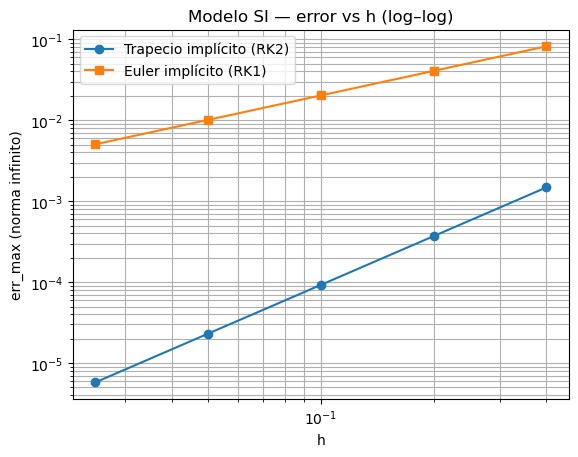

In [3]:
# Parámetros del experimento para SI
beta_SI = 0.5
N_SI = 1.0
I0 = 0.01
t0 = 0.0
T_final = 20.0

# Lista de pasos geométrica: h_k = T_final / (N_base * 2^k)
N_base = 50          # número de pasos en el nivel más grueso
niveles = 5          # cantidad de niveles (duplicando pasos cada vez)
hs = [T_final / (N_base * (2**k)) for k in range(niveles)]

errores_trap = []
errores_euler_imp = []

for h in hs:
    n_pasos = int(round(T_final / h))
    # Trapecio implícito (1D)
    t_trap, I_trap = trapecio_implicito_1d(
        f=lambda t, I: f_SI(t, I, beta_SI, N_SI),
        df_dy=lambda t, I: df_dI_SI(t, I, beta_SI, N_SI),
        t0=t0, y0=I0, h=h, n_pasos=n_pasos
    )
    e_trap = error_global_infinito_1d(
        t_trap, I_trap,
        solucion_exacta=lambda tt: I_SI_explicita(tt, beta_SI, N_SI, I0)
    )
    errores_trap.append(e_trap)

    # Euler implícito (1D)
    t_eu, I_eu = euler_implicito_1d(
        f=lambda t, I: f_SI(t, I, beta_SI, N_SI),
        df_dy=lambda t, I: df_dI_SI(t, I, beta_SI, N_SI),
        t0=t0, y0=I0, h=h, n_pasos=n_pasos
    )
    e_eu = error_global_infinito_1d(
        t_eu, I_eu,
        solucion_exacta=lambda tt: I_SI_explicita(tt, beta_SI, N_SI, I0)
    )
    errores_euler_imp.append(e_eu)

# Tablas de EOC
tabla_trap = construir_tabla_eoc(hs, errores_trap)
tabla_eu = construir_tabla_eoc(hs, errores_euler_imp)

print("Tabla — Trapecio implícito (SI):")
display(tabla_trap)
print("\nTabla — Euler implícito (SI):")
display(tabla_eu)

# Gráfica comparativa (misma figura, sin especificar colores)
plt.figure()
plt.loglog(hs, errores_trap, marker='o', label='Trapecio implícito (RK2)')
plt.loglog(hs, errores_euler_imp, marker='s', label='Euler implícito (RK1)')
plt.xlabel('h')
plt.ylabel('err_max (norma infinito)')
plt.title('Modelo SI — error vs h (log–log)')
plt.grid(True, which='both')
plt.legend()
plt.show()

## Modelo **SIR** (reducción a 2 ecuaciones)
Las enfermedades infecciosas que generan inmunidad después de la infección —como el sarampión o la varicela— pueden modelarse considerando tres *poblaciones* o *compartimentos* en cada tiempo $t$:  
- los **susceptibles** $S(t)$, que aún pueden enfermarse,  
- los **infectados** $I(t)$, que portan la enfermedad y pueden contagiar a otros, y  
- los **removidos** $R(t)$, que ya no participan en la transmisión (porque se recuperaron o murieron).

Con $\beta>0$ y $\gamma>0$,
$$
\begin{aligned}
S' &= -\beta\,\frac{S I}{N},\\
I' &= \beta\,\frac{S I}{N} - \gamma I,\\
R' &= \gamma I,\\\qquad S+I+R&=N.
\end{aligned}
$$
Eliminando $R=N-S-I$ se obtiene un **sistema 2D** en $(S,I)$:
$$\
\begin{aligned}
S' &= -\beta\,\frac{S I}{N},\\
I' &= \beta\,\frac{S I}{N} - \gamma I.
\end{aligned}
$$

<span style="font-family:Georgia;">

## Método de Newton para **sistemas** $G: \mathbb{R}^m\to\mathbb{R}^m$

Dada $G(y)=0$, con Jacobiano $J_G(y)$, las iteraciones son
$$\
y_{k+1} \;=\; y_k \;-\; J_G(y_k)^{-1}\,G(y_k),
$$
equivalentemente, resolver $J_G(y_k) s_k = G(y_k)$ y poner $y_{k+1}=y_k - s_k$.
El criterio de paro puede basarse en $\|s_k\|_{\infty}$.

<span style="font-family:Georgia;">

## Implementación del método del trapecio implícito multivariable + Newton; aplicación a **SIR**  
También implementamos **RK4** para obtener una solución de referencia.


Tabla — Trapecio implícito (SIR):


,h,err_max,err_rate
0,2.000,0.005328,NaN
1,1.000,0.001345,1.985661
2,0.500,0.000337,1.996569
3,0.250,0.000084,1.998077
4,0.125,0.000021,1.999222


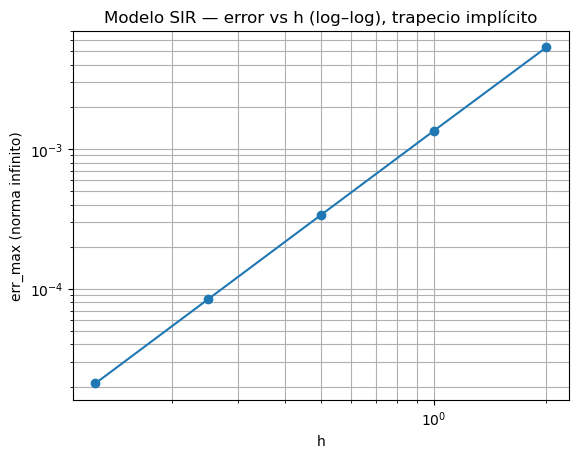

In [4]:
# Experimento con SIR
beta_SIR = 0.5
gamma_SIR = 0.2
N_SIR = 1.0
S0, I0 = 0.99, 0.01       # R0 = 0 inicialmente
t0 = 0.0
T_final = 120.0

# malla de pasos para medir EOC
N_base = 60
niveles = 5
hs = [T_final / (N_base * (2**k)) for k in range(niveles)]

# solución de referencia con RK4 en una malla mucho más fina (compatible)
k_extra = 3  # ref 2^k_extra veces más pasos que el nivel más fino usado
N_ref = N_base * (2**(niveles + k_extra))
h_ref = T_final / N_ref
n_ref = int(N_ref)

def Fsir(t, y):
    return F_SIR(t, y, beta_SIR, gamma_SIR, N_SIR)

def JFsir(t, y):
    return JF_SIR(t, y, beta_SIR, gamma_SIR, N_SIR)

# Referencia
t_ref, Y_ref = rk4_sistema(Fsir, t0, np.array([S0, I0], dtype=float), h_ref, n_ref)

errores_sir = []

for h in hs:
    n = int(round(T_final / h))
    t_trap, Y_trap = trapecio_implicito_sistema(Fsir, JFsir, t0, np.array([S0, I0]), h, n)

    # Comparamos contra la referencia en los nodos gruesos (submuestreo de ref)
    factor = int(round(h / h_ref))
    Y_ref_coincidente = Y_ref[::factor, :]
    e = error_global_infinito_vector(Y_trap, Y_ref_coincidente)
    errores_sir.append(e)

tabla_sir = construir_tabla_eoc(hs, errores_sir)
print("Tabla — Trapecio implícito (SIR):")
display(tabla_sir)

grafica_error_vs_h_loglog(hs, errores_sir, 'Modelo SIR — error vs h (log–log), trapecio implícito')


<span style="font-family:Georgia;">

## Modelo **SIRV** (vacunación)

Una forma sencilla de incluir vacunación a tasa constante $\nu>0$ es:
$$
\begin{aligned}
S' &= -\beta\,\frac{S I}{N} \;-\; \nu S,\\
I' &= \beta\,\frac{S I}{N} \;-\; \gamma I,\\
R' &= \gamma I,\\
V' &= \nu S,\\\qquad S+I+R+V&=N.
\end{aligned}
$$
Integramos el sistema en dimensión 4 con trapecio implícito y lo comparamos con una
solución de referencia **RK4** más fina para calcular error/EOC.


Tabla — Trapecio implícito (SIRV):


,h,err_max,err_rate
0,2.000,0.002117,NaN
1,1.000,0.000524,2.013676
2,0.500,0.000131,2.003447
3,0.250,0.000033,2.000863
4,0.125,0.000008,2.000159


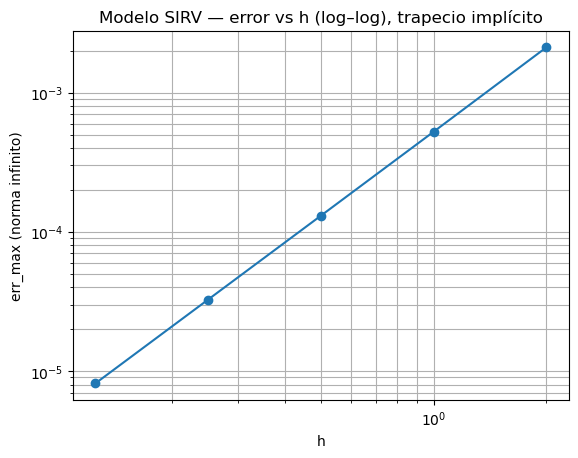

In [5]:
# Experimento con SIRV
beta_SIRV = 0.5
gamma_SIRV = 0.2
nu_SIRV = 0.05
N_SIRV = 1.0
S0, I0, R0, V0 = 0.99, 0.01, 0.0, 0.0
t0 = 0.0
T_final = 160.0

# malla de pasos para EOC
N_base = 80
niveles = 5
hs = [T_final / (N_base * (2**k)) for k in range(niveles)]

# referencia con RK4
k_extra = 3
N_ref = N_base * (2**(niveles + k_extra))
h_ref = T_final / N_ref
n_ref = int(N_ref)

def Fsirv(t, y):
    return F_SIRV(t, y, beta_SIRV, gamma_SIRV, nu_SIRV, N_SIRV)

def JFsirv(t, y):
    return JF_SIRV(t, y, beta_SIRV, gamma_SIRV, nu_SIRV, N_SIRV)

t_ref, Y_ref = rk4_sistema(Fsirv, t0, np.array([S0, I0, R0, V0], dtype=float), h_ref, n_ref)

errores_sirv = []

for h in hs:
    n = int(round(T_final / h))
    t_trap, Y_trap = trapecio_implicito_sistema(Fsirv, JFsirv, t0, np.array([S0, I0, R0, V0]), h, n)
    factor = int(round(h / h_ref))
    Y_ref_coincidente = Y_ref[::factor, :]
    e = error_global_infinito_vector(Y_trap, Y_ref_coincidente)
    errores_sirv.append(e)

tabla_sirv = construir_tabla_eoc(hs, errores_sirv)
print("Tabla — Trapecio implícito (SIRV):")
display(tabla_sirv)

grafica_error_vs_h_loglog(hs, errores_sirv, 'Modelo SIRV — error vs h (log–log), trapecio implícito')


<span style="font-family:Georgia;">

## Ejercicio: Preguntas de **interpretación biológica** 
Usando los parámetros ya dados en la práctica para los modelos SIR y SIRV responde de manera empírica las sigueitnes preguntas:

**(a)** ¿Cuándo y cuánto es el **pico de infectados** $I(t)$ en SIR/SIRV? Grafica las trayecorias de $S(t),I(t),R(t)$ en el modelo SIR y agrega $V(t)$ en la gráfica de las taryectorias del modelo SIRV.  
**(b)** ¿Cuál es el **número básico de reproducción** $R_0=\beta/\gamma$ y el umbral de **inmunidad de rebaño** $p_c=1-1/R_0$ (si $R_0>1$)?  
**(c)** En SIRV, ¿cómo afecta la **tasa de vacunación** $\nu$ a $I_{\max}$ y al tiempo del pico?  
**(d)** ¿Cuál es la fracción **final** en $R+V$ (inmunizada) al finalizar la simulación?

(a) Picos de I(t):
   SIR  -> I_max = 0.303813 en t = 26.63
   SIRV -> I_max = 0.046755 en t = 18.28

(b) Números básicos de reproducción y umbrales de rebaño:
   SIR  -> R0 = 3.000, p_c = 0.6666666666666666
   SIRV -> R0 = 3.000, p_c = 0.6666666666666666

(c) Efecto de la tasa de vacunación nu en el pico (SIRV):
   nu = 0.000  ->  I_max = 0.303813  en t = 26.64
   nu = 0.025  ->  I_max = 0.106603  en t = 25.12
   nu = 0.050  ->  I_max = 0.046755  en t = 18.28
   nu = 0.075  ->  I_max = 0.029910  en t = 13.32
   nu = 0.100  ->  I_max = 0.023206  en t = 10.32
   nu = 0.125  ->  I_max = 0.019772  en t = 8.38
   nu = 0.150  ->  I_max = 0.017721  en t = 7.04

(d) Fracción final inmunizada (R+V) en SIRV: 0.999790


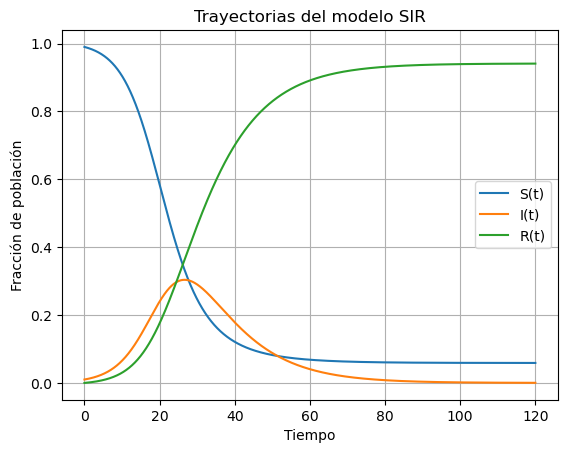

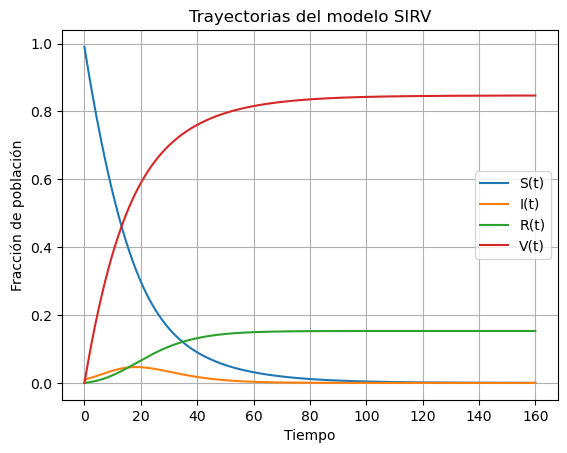

In [10]:
"""
src/respuestas_clase21.py
Funciones y parámetros
Modelos SIR y SIRV con integración RK4
"""
%matplotlib inline 
#no supe como hacer que todo corriera (gráficas incluidas)en una misma celda, encontre este comando que arrelgo todo
import numpy as np
import matplotlib.pyplot as plt

# Modelo SIR
beta_SIR = 0.3    
gamma_SIR = 0.1     
N_SIR = 1.0         

# Modelo SIRV
beta_SIRV = 0.3    
gamma_SIRV = 0.1   
nu_SIRV = 0.05     
N_SIRV = 1.0       

# Condiciones iniciales (idénticas en ambos)
S0 = 0.99
I0 = 0.01
R0 = 0.0
V0 = 0.0

def F_SIR(t, y, beta, gamma, N):
    """
    Campo de velocidades del modelo SIR.
    y = [S, I]
    """
    S, I = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    return np.array([dSdt, dIdt])


def F_SIRV(t, y, beta, gamma, nu, N):
    """
    Campo de velocidades del modelo SIRV.
    y = [S, I, R, V]
    """
    S, I, R, V = y
    dSdt = -beta * S * I / N - nu * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return np.array([dSdt, dIdt, dRdt, dVdt])

def rk4_sistema(f, t0, y0, h, n_pasos):
    """
    Integra un sistema de ecuaciones diferenciales ordinarias mediante el método de Runge-Kutta de orden 4.
    f : función (t, y) -> derivadas
    t0 : tiempo inicial
    y0 : vector de condiciones iniciales
    h : paso de integración
    n_pasos : número de pasos
    Lo que hemos hecho muchas veces
    """
    y = np.zeros((n_pasos + 1, len(y0)))
    t = np.zeros(n_pasos + 1)
    y[0] = y0
    t[0] = t0

    for i in range(n_pasos):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h / 2, y[i] + h * k1 / 2)
        k3 = f(t[i] + h / 2, y[i] + h * k2 / 2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t[i + 1] = t[i] + h

    return t, y

def encontrar_pico_I(t, Y, indice_I=1):
    """
    El máximo de I(t)
    """
    I = Y[:, indice_I]
    imax = np.max(I)
    tmax = t[np.argmax(I)]
    return imax, tmax


def R0_basico(beta, gamma):
    """
    Número básico de reproducción R0 = beta / gamma
    """
    if gamma == 0:
        return np.inf
    return beta / gamma


def umbral_inmunidad_rebano(beta, gamma):
    """
    Calcula el umbral de inmunidad de rebaño p_c = 1 - 1/R0 si R0>1.
    """
    R0 = R0_basico(beta, gamma)
    if R0 <= 1:
        return None
    return 1 - 1 / R0



# (a) Pico en SIR
t_ref_sir, Y_ref_sir = rk4_sistema(
    lambda t, y: F_SIR(t, y, beta_SIR, gamma_SIR, N_SIR),
    t0, np.array([S0, I0], dtype=float), h=0.01, n_pasos=int(120/0.01)
)
Imax_sir, tImax_sir = encontrar_pico_I(t_ref_sir, Y_ref_sir, indice_I=1)

# (a) Pico en SIRV (con la nu_SIRV definida antes)
t_ref_sirv, Y_ref_sirv = rk4_sistema(
    lambda t, y: F_SIRV(t, y, beta_SIRV, gamma_SIRV, nu_SIRV, N_SIRV),
    0.0, np.array([S0, I0, R0, V0], dtype=float), h=0.01, n_pasos=int(160/0.01)
)
Imax_sirv, tImax_sirv = encontrar_pico_I(t_ref_sirv, Y_ref_sirv, indice_I=1)

# (b) R0 y umbral
r0_sir = R0_basico(beta_SIR, gamma_SIR)
pc_sir = umbral_inmunidad_rebano(beta_SIR, gamma_SIR)

r0_sirv = R0_basico(beta_SIRV, gamma_SIRV)
pc_sirv = umbral_inmunidad_rebano(beta_SIRV, gamma_SIRV)

# (c) Barrido simple en nu para ver efecto en pico (SIRV)
nus = np.linspace(0.0, 0.15, 7)
picos = []
tiempos_pico = []
for nu in nus:
    t_tmp, Y_tmp = rk4_sistema(
        lambda t, y, nu=nu: F_SIRV(t, y, beta_SIRV, gamma_SIRV, nu, N_SIRV),
        0.0, np.array([S0, I0, R0, V0], dtype=float), h=0.02, n_pasos=int(160/0.02)
    )
    Imax, tImax = encontrar_pico_I(t_tmp, Y_tmp, indice_I=1)
    picos.append(Imax)
    tiempos_pico.append(tImax)

# (d) Fracción final inmunizada (R+V) al finalizar la simulación para SIRV
R_final = Y_ref_sirv[-1, 2]
V_final = Y_ref_sirv[-1, 3]
fraccion_inmunizada_final = (R_final + V_final) / N_SIRV

# Mostramos resultados
print("(a) Picos de I(t):")
print(f"   SIR  -> I_max = {Imax_sir:.6f} en t = {tImax_sir:.2f}")
print(f"   SIRV -> I_max = {Imax_sirv:.6f} en t = {tImax_sirv:.2f}\n")

print("(b) Números básicos de reproducción y umbrales de rebaño:")
print(f"   SIR  -> R0 = {r0_sir:.3f}, p_c = {pc_sir if pc_sir is not None else 'no aplica (R0<=1)'}")
print(f"   SIRV -> R0 = {r0_sirv:.3f}, p_c = {pc_sirv if pc_sirv is not None else 'no aplica (R0<=1)'}\n")

print("(c) Efecto de la tasa de vacunación nu en el pico (SIRV):")
for nu, imax, tp in zip(nus, picos, tiempos_pico):
    print(f"   nu = {nu:.3f}  ->  I_max = {imax:.6f}  en t = {tp:.2f}")

print(f"\n(d) Fracción final inmunizada (R+V) en SIRV: {fraccion_inmunizada_final:.6f}")

def graficar_SIR(t, Y, titulo="Modelo SIR"):
    """
    Grafica S(t), I(t), R(t)
    """
    S = Y[:, 0]
    I = Y[:, 1]
    R = 1 - S - I  # si no está integrado explícitamente
    plt.figure()
    plt.plot(t, S, label="S(t)")
    plt.plot(t, I, label="I(t)")
    plt.plot(t, R, label="R(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Fracción de población")
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()


def graficar_SIRV(t, Y, titulo="Modelo SIRV"):
    """
    Grafica S(t), I(t), R(t), V(t)
    """
    S, I, R, V = Y.T
    plt.figure()
    plt.plot(t, S, label="S(t)")
    plt.plot(t, I, label="I(t)")
    plt.plot(t, R, label="R(t)")
    plt.plot(t, V, label="V(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Fracción de población")
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()

graficar_SIR(t_ref_sir, Y_ref_sir, titulo="Trayectorias del modelo SIR")
graficar_SIRV(t_ref_sirv, Y_ref_sirv, titulo="Trayectorias del modelo SIRV")



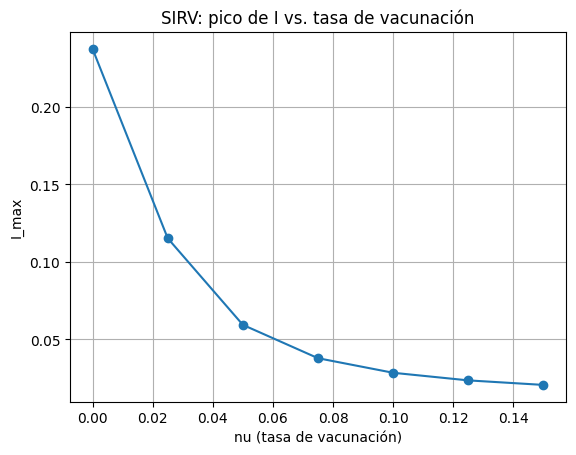

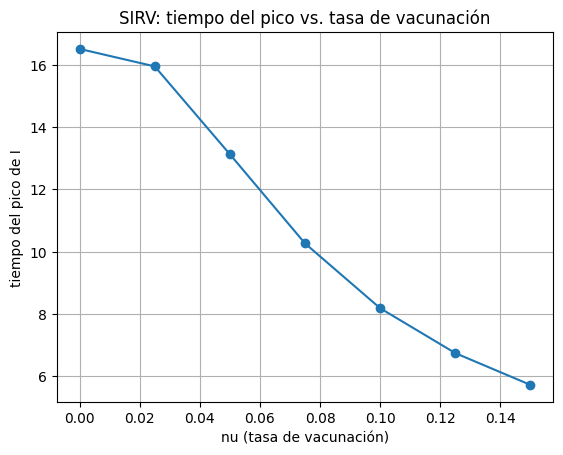

In [ ]:
# Gráficas auxiliares para (c): I_max y tiempo del pico vs. nu (cada una en su figura)
plt.figure()
plt.plot(nus, picos, marker='o')
plt.xlabel('nu (tasa de vacunación)')
plt.ylabel('I_max')
plt.title('SIRV: pico de I vs. tasa de vacunación')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(nus, tiempos_pico, marker='o')
plt.xlabel('nu (tasa de vacunación)')
plt.ylabel('tiempo del pico de I')
plt.title('SIRV: tiempo del pico vs. tasa de vacunación')
plt.grid(True)
plt.show()

<span style="font-family:Georgia;">

### Referencias 

- **Ascher, U. M., & Petzold, L. R. (1998).** *Computer Methods for Ordinary Differential Equations and Differential-Algebraic Equations.* SIAM.  
- **Hairer, E., Nørsett, S. P., & Wanner, G. (1993).** *Solving Ordinary Differential Equations I: Nonstiff Problems.* Springer Series in Computational Mathematics.  

- **Iserles, A. (2008).** *A First Course in the Numerical Analysis of Differential Equations.* Cambridge University Press.  

- **Burden, R. L., & Faires, J. D. (2011).** *Análisis Numérico.* Cengage Learning 